In [1]:
import json
import pandas as pd
import gzip

# To count frequency in lists
import collections

# For graphing
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [2]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l.decode('utf-8'))

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('/Users/yujinglai/Dropbox/Eugenie/data/new_amazon_cell_phone_accessories/meta_Cell_Phones_and_Accessories.json.gz')

In [3]:
# Drop irrelevant columns
df.drop(['image', 'feature', 'also_buy', 'also_view', 'similar_item', 'date', 'details', 'tech1', 'tech2', 'fit'], axis=1, inplace=True)

In [4]:
# Drop records with nan in category
df = df.dropna(subset=['category'])

In [5]:
def findAmazon(x):
    return 'Amazon' in x or 'amazon' in x or 'AmazonBasics' in x or 'amazonbasics' in x or 'Amazonbasics' in x or 'amazonBasics' in x;

In [6]:
# Find cables based on key words
df['title'] = df['title'].apply(str)
df_amazon = df.loc[df['title'].apply(findAmazon)]

In [8]:
def findValid(x):
    return 'aPageStart' not in x
df_amazon = df_amazon.loc[df_amazon['title'].apply(findValid)]

In [10]:
# Convert brand column to string
df['brand'] = df['brand'].apply(str)

In [11]:
# Check if there is AmazonBasics products
df_amazon = df.loc[df['brand'].apply(findAmazon)]

In [19]:
#df_amazon.shape

In [20]:
# This is for showing or hiding code
import ipywidgets as widgets
from IPython.display import display, HTML

javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Show code", True: "Hide code"}


def toggle_code(state):

    """
    Toggles the JavaScript show()/hide() function on the div.input element.
    """

    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)

    display(HTML(output))


def button_action(value):

    """
    Calls the toggle_code function and updates the button description.
    """

    state = value.new

    toggle_code(state)

    value.owner.description = button_descriptions[state]


state = False
toggle_code(state)

button = widgets.ToggleButton(state, description = button_descriptions[state])
button.observe(button_action, "value")

display(button)

ToggleButton(value=False, description='Show code')

### Histogram and labels from main_cat column

In [13]:
df = df_amazon
# All records have the same category labels
df['main_cat'] = df['main_cat'].apply(str)
main_cats = list(df['main_cat'])

# Count the frequency of each subcategory in the list
counter_main = collections.Counter(main_cats) # Ordered by freq
counter_main = {k: v for k, v in reversed(sorted(counter_main.items(), key=lambda item: item[1]))}

Text(0,0.5,'Number of products')

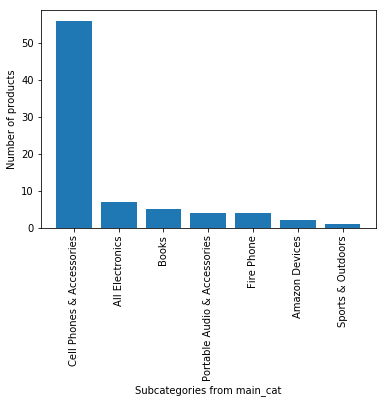

In [14]:
plt.bar(counter_main.keys(), counter_main.values())
plt.xticks(rotation=90)
plt.xlabel("Subcategories from main_cat")
plt.ylabel("Number of products")

### Histogram and labels from category column

In [15]:
# All records have the same category labels
cats = []
df['category'].apply(lambda x: cats.extend(x))
print("There are %d unique subcategories" % len(set(cats)))

There are 16 unique subcategories


In [16]:
# Count the frequency of each subcategory in the list
counter = collections.Counter(cats) # Ordered by freq
counter = {k: v for k, v in reversed(sorted(counter.items(), key=lambda item: item[1]))}

Text(0,0.5,'Number of products')

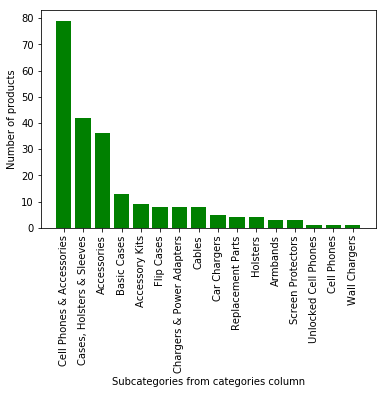

In [18]:
plt.bar(counter.keys(), counter.values(), color='g')
plt.xticks(rotation='vertical')
plt.xlabel("Subcategories from categories column")
plt.ylabel("Number of products")